# 🤖 3단계: 모델 구현 및 비교

## 📋 목표
- Linear Regression 기본 모델
- Ridge Regression (L2 정규화)
- Lasso Regression (L1 정규화)
- 모델별 성능 지표 비교 (MSE, MAE, R²)

## 📊 분석 내용
1. 기본 Linear Regression 모델 구현
2. Ridge Regression (L2 정규화) 구현
3. Lasso Regression (L1 정규화) 구현
4. 정규화 강도(alpha) 값에 따른 성능 변화
5. 특성 계수 변화 분석
6. 모델별 과적합 방지 효과 확인

In [1]:
# 필요한 라이브러리 import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, validation_curve
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# 한글 폰트 설정
import sys
import os
sys.path.append(os.path.join(os.path.dirname(os.getcwd()), 'src'))
from font_setup import setup_korean_font
setup_korean_font()

# 시각화 설정
plt.style.use('default')
sns.set_palette("husl")

✅ 한글 폰트 설정 완료: Malgun Gothic


## 1️⃣ 데이터 준비 및 전처리

In [2]:
# 데이터 로드
california_housing = fetch_california_housing()
X = california_housing.data
y = california_housing.target
feature_names = california_housing.feature_names

print("📊 California Housing Dataset 정보")
print(f"특성 수: {X.shape[1]}")
print(f"샘플 수: {X.shape[0]}")
print(f"특성 이름: {list(feature_names)}")

# 훈련/테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 정규화 적용 (Ridge, Lasso에서 중요!)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\n📊 데이터 분할 결과")
print(f"훈련 데이터: {X_train.shape[0]}개 샘플")
print(f"테스트 데이터: {X_test.shape[0]}개 샘플")
print("✅ StandardScaler 정규화 적용 완료")

📊 California Housing Dataset 정보
특성 수: 8
샘플 수: 20640
특성 이름: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']

📊 데이터 분할 결과
훈련 데이터: 16512개 샘플
테스트 데이터: 4128개 샘플
✅ StandardScaler 정규화 적용 완료


## 2️⃣ 모델별 구현 및 성능 평가

In [3]:
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    """
    모델 훈련 및 평가 함수
    """
    # 모델 훈련
    model.fit(X_train, y_train)
    
    # 예측
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # 성능 지표 계산
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    
    return {
        'Model': model_name,
        'Train_MSE': train_mse,
        'Test_MSE': test_mse,
        'Train_RMSE': np.sqrt(train_mse),
        'Test_RMSE': np.sqrt(test_mse),
        'Train_MAE': train_mae,
        'Test_MAE': test_mae,
        'Train_R2': train_r2,
        'Test_R2': test_r2,
        'Overfitting': train_r2 - test_r2,  # 과적합 정도
        'Predictions': y_test_pred,
        'Coefficients': model.coef_ if hasattr(model, 'coef_') else None
    }

# 결과 저장용 딕셔너리
results = {}

print("🤖 모델별 훈련 및 평가 시작")
print("=" * 50)

🤖 모델별 훈련 및 평가 시작


In [4]:
# 1. Linear Regression (기본 모델)
print("1️⃣ Linear Regression 훈련...")
linear_model = LinearRegression()
results['linear'] = evaluate_model(
    linear_model, X_train_scaled, X_test_scaled, y_train, y_test, 'Linear Regression'
)
print(f"   ✅ 완료 - Test R²: {results['linear']['Test_R2']:.4f}")

1️⃣ Linear Regression 훈련...
   ✅ 완료 - Test R²: 0.5758


In [5]:
# 2. Ridge Regression (L2 정규화) - 여러 alpha 값 테스트
print("\n2️⃣ Ridge Regression 훈련...")
alpha_values = [0.1, 1.0, 10.0, 100.0]

for alpha in alpha_values:
    ridge_model = Ridge(alpha=alpha, random_state=42)
    model_name = f'Ridge (α={alpha})'
    results[f'ridge_{alpha}'] = evaluate_model(
        ridge_model, X_train_scaled, X_test_scaled, y_train, y_test, model_name
    )
    print(f"   ✅ α={alpha} - Test R²: {results[f'ridge_{alpha}']['Test_R2']:.4f}")

# 최적 Ridge 모델 선택 (가장 높은 Test R²)
best_ridge_key = max([k for k in results.keys() if k.startswith('ridge')], 
                     key=lambda x: results[x]['Test_R2'])
best_ridge_alpha = float(best_ridge_key.split('_')[1])
print(f"   🎯 최적 Ridge α: {best_ridge_alpha}")


2️⃣ Ridge Regression 훈련...
   ✅ α=0.1 - Test R²: 0.5758
   ✅ α=1.0 - Test R²: 0.5758
   ✅ α=10.0 - Test R²: 0.5761
   ✅ α=100.0 - Test R²: 0.5778
   🎯 최적 Ridge α: 100.0


In [6]:
# 3. Lasso Regression (L1 정규화) - 여러 alpha 값 테스트
print("\n3️⃣ Lasso Regression 훈련...")
alpha_values = [0.01, 0.1, 1.0, 10.0]

for alpha in alpha_values:
    lasso_model = Lasso(alpha=alpha, random_state=42, max_iter=2000)
    model_name = f'Lasso (α={alpha})'
    results[f'lasso_{alpha}'] = evaluate_model(
        lasso_model, X_train_scaled, X_test_scaled, y_train, y_test, model_name
    )
    print(f"   ✅ α={alpha} - Test R²: {results[f'lasso_{alpha}']['Test_R2']:.4f}")

# 최적 Lasso 모델 선택
best_lasso_key = max([k for k in results.keys() if k.startswith('lasso')], 
                     key=lambda x: results[x]['Test_R2'])
best_lasso_alpha = float(best_lasso_key.split('_')[1])
print(f"   🎯 최적 Lasso α: {best_lasso_alpha}")


3️⃣ Lasso Regression 훈련...
   ✅ α=0.01 - Test R²: 0.5816
   ✅ α=0.1 - Test R²: 0.4814
   ✅ α=1.0 - Test R²: -0.0002
   ✅ α=10.0 - Test R²: -0.0002
   🎯 최적 Lasso α: 0.01


## 3️⃣ 모델 성능 비교 분석

In [7]:
# 주요 모델들의 성능 비교 표 생성
comparison_models = [
    'linear',
    best_ridge_key,
    best_lasso_key
]

comparison_df = pd.DataFrame([
    {
        '모델': results[key]['Model'],
        'Train_R²': results[key]['Train_R2'],
        'Test_R²': results[key]['Test_R2'],
        'Train_RMSE': results[key]['Train_RMSE'],
        'Test_RMSE': results[key]['Test_RMSE'],
        'Over fitting': results[key]['Overfitting']
    }
    for key in comparison_models
])

print("📊 주요 모델 성능 비교")
print("=" * 80)
print(comparison_df.round(4))

# 최고 성능 모델 확인
best_model = comparison_df.loc[comparison_df['Test_R²'].idxmax()]
print(f"\n🏆 최고 성능 모델: {best_model['모델']} (Test R² = {best_model['Test_R²']:.4f})")

📊 주요 모델 성능 비교
                  모델  Train_R²  Test_R²  Train_RMSE  Test_RMSE  Over fitting
0  Linear Regression    0.6126   0.5758      0.7197     0.7456        0.0368
1    Ridge (α=100.0)    0.6120   0.5778      0.7202     0.7438        0.0342
2     Lasso (α=0.01)    0.6085   0.5816      0.7235     0.7404        0.0269

🏆 최고 성능 모델: Lasso (α=0.01) (Test R² = 0.5816)


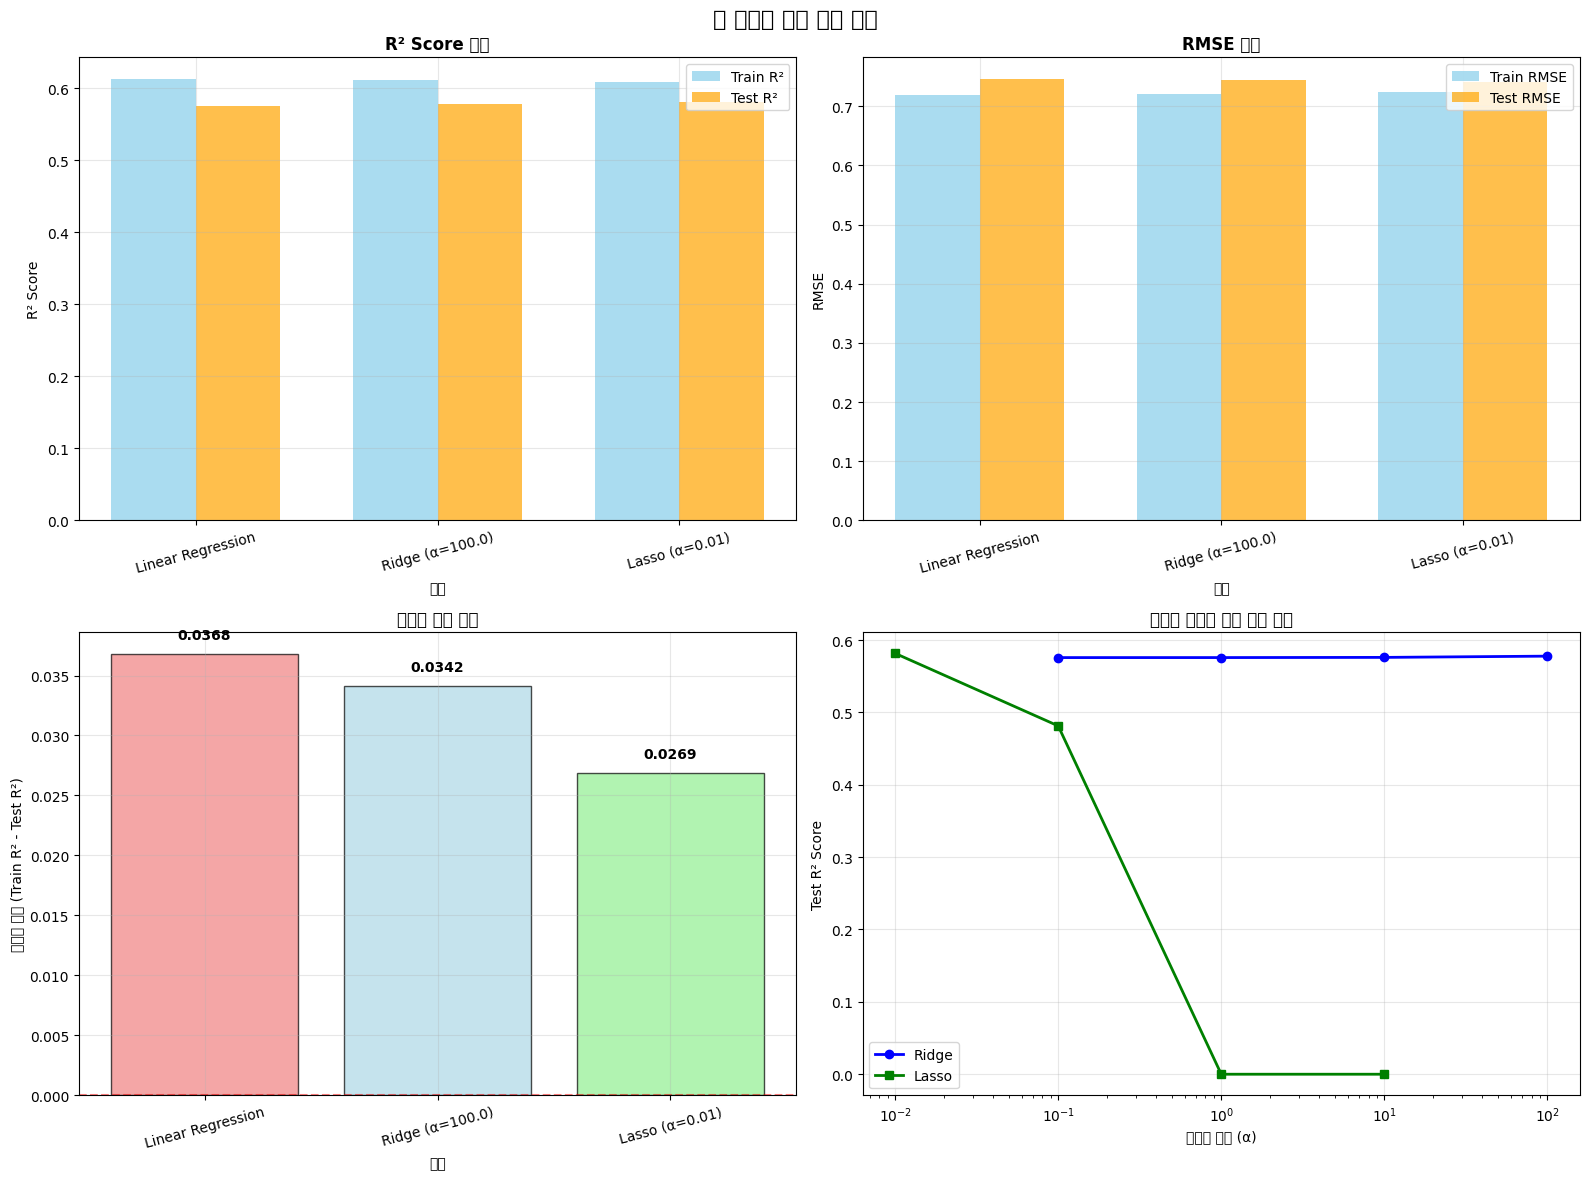

In [8]:
# 성능 지표 시각화
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('📊 모델별 성능 지표 비교', fontsize=16, fontweight='bold')

models = [results[key]['Model'] for key in comparison_models]
colors = ['lightcoral', 'lightblue', 'lightgreen']

# R² Score 비교
train_r2 = [results[key]['Train_R2'] for key in comparison_models]
test_r2 = [results[key]['Test_R2'] for key in comparison_models]

x = np.arange(len(models))
width = 0.35

axes[0, 0].bar(x - width/2, train_r2, width, label='Train R²', alpha=0.7, color='skyblue')
axes[0, 0].bar(x + width/2, test_r2, width, label='Test R²', alpha=0.7, color='orange')
axes[0, 0].set_xlabel('모델')
axes[0, 0].set_ylabel('R² Score')
axes[0, 0].set_title('R² Score 비교', fontweight='bold')
axes[0, 0].set_xticks(x)
axes[0, 0].set_xticklabels(models, rotation=15)
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# RMSE 비교
train_rmse = [results[key]['Train_RMSE'] for key in comparison_models]
test_rmse = [results[key]['Test_RMSE'] for key in comparison_models]

axes[0, 1].bar(x - width/2, train_rmse, width, label='Train RMSE', alpha=0.7, color='skyblue')
axes[0, 1].bar(x + width/2, test_rmse, width, label='Test RMSE', alpha=0.7, color='orange')
axes[0, 1].set_xlabel('모델')
axes[0, 1].set_ylabel('RMSE')
axes[0, 1].set_title('RMSE 비교', fontweight='bold')
axes[0, 1].set_xticks(x)
axes[0, 1].set_xticklabels(models, rotation=15)
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 과적합 정도 비교
overfitting = [results[key]['Overfitting'] for key in comparison_models]

bars = axes[1, 0].bar(models, overfitting, color=colors, alpha=0.7, edgecolor='black')
axes[1, 0].set_xlabel('모델')
axes[1, 0].set_ylabel('과적합 정도 (Train R² - Test R²)')
axes[1, 0].set_title('과적합 정도 비교', fontweight='bold')
axes[1, 0].tick_params(axis='x', rotation=15)
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].axhline(y=0, color='red', linestyle='--', alpha=0.5)

# 막대 위에 값 표시
for bar, value in zip(bars, overfitting):
    height = bar.get_height()
    axes[1, 0].text(bar.get_x() + bar.get_width()/2., height + (0.001 if height > 0 else -0.001),
                   f'{value:.4f}', ha='center', va='bottom' if height > 0 else 'top', fontweight='bold')

# Alpha 값에 따른 성능 변화 (Ridge)
ridge_alphas = [0.1, 1.0, 10.0, 100.0]
ridge_test_r2 = [results[f'ridge_{alpha}']['Test_R2'] for alpha in ridge_alphas]

axes[1, 1].plot(ridge_alphas, ridge_test_r2, 'o-', color='blue', linewidth=2, markersize=6, label='Ridge')

# Lasso 추가
lasso_alphas = [0.01, 0.1, 1.0, 10.0]
lasso_test_r2 = [results[f'lasso_{alpha}']['Test_R2'] for alpha in lasso_alphas]

axes[1, 1].plot(lasso_alphas, lasso_test_r2, 's-', color='green', linewidth=2, markersize=6, label='Lasso')

axes[1, 1].set_xlabel('정규화 강도 (α)')
axes[1, 1].set_ylabel('Test R² Score')
axes[1, 1].set_title('정규화 강도에 따른 성능 변화', fontweight='bold')
axes[1, 1].set_xscale('log')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 4️⃣ 특성 계수 분석 - 정규화 효과 확인

In [9]:
# 모델별 계수 비교
coefficients_df = pd.DataFrame({
    '특성': feature_names,
    'Linear': results['linear']['Coefficients'],
    'Ridge': results[best_ridge_key]['Coefficients'],
    'Lasso': results[best_lasso_key]['Coefficients']
})

print("🔍 모델별 특성 계수 비교")
print("=" * 60)
print(coefficients_df.round(4))

# Lasso에서 0이 된 특성 확인
zero_features = coefficients_df[coefficients_df['Lasso'] == 0]['특성'].tolist()
if zero_features:
    print(f"\n✂️ Lasso에서 제거된 특성: {zero_features}")
else:
    print(f"\n📊 Lasso에서 모든 특성이 유지됨")

print(f"\n🎯 특성 선택 효과:")
print(f"• Linear/Ridge: 모든 특성 사용 ({len(feature_names)}개)")
print(f"• Lasso: {len(feature_names) - len(zero_features)}개 특성 사용")

🔍 모델별 특성 계수 비교
           특성  Linear   Ridge   Lasso
0      MedInc  0.8544  0.8481  0.8010
1    HouseAge  0.1225  0.1295  0.1271
2    AveRooms -0.2944 -0.2745 -0.1628
3   AveBedrms  0.3393  0.3148  0.2062
4  Population -0.0023 -0.0000 -0.0000
5    AveOccup -0.0408 -0.0411 -0.0306
6    Latitude -0.8969 -0.8276 -0.7901
7   Longitude -0.8698 -0.7996 -0.7557

✂️ Lasso에서 제거된 특성: ['Population']

🎯 특성 선택 효과:
• Linear/Ridge: 모든 특성 사용 (8개)
• Lasso: 7개 특성 사용


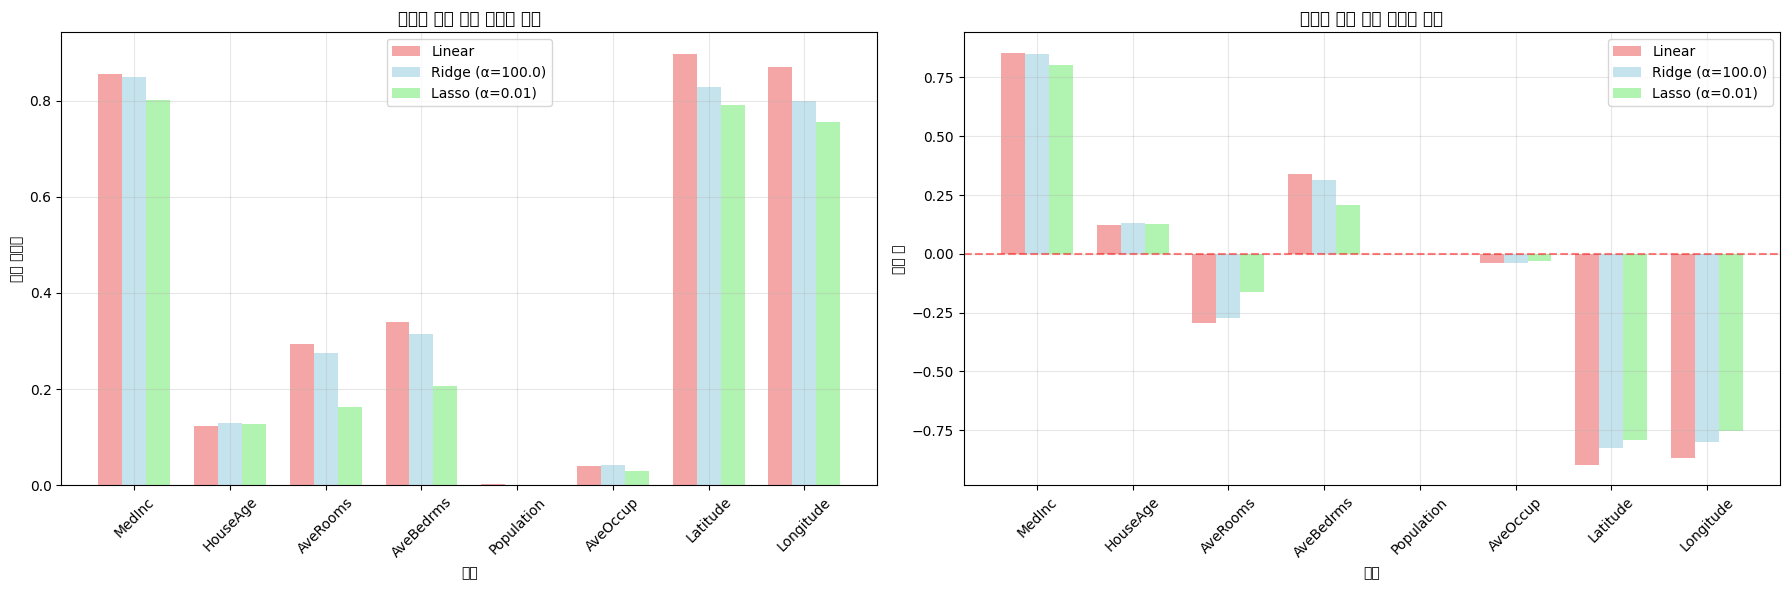

In [10]:
# 계수 크기 비교 시각화
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# 계수 절댓값 비교
x = np.arange(len(feature_names))
width = 0.25

ax1.bar(x - width, np.abs(coefficients_df['Linear']), width, 
        label='Linear', alpha=0.7, color='lightcoral')
ax1.bar(x, np.abs(coefficients_df['Ridge']), width, 
        label=f'Ridge (α={best_ridge_alpha})', alpha=0.7, color='lightblue')
ax1.bar(x + width, np.abs(coefficients_df['Lasso']), width, 
        label=f'Lasso (α={best_lasso_alpha})', alpha=0.7, color='lightgreen')

ax1.set_xlabel('특성')
ax1.set_ylabel('계수 절댓값')
ax1.set_title('모델별 특성 계수 절댓값 비교', fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(feature_names, rotation=45)
ax1.legend()
ax1.grid(True, alpha=0.3)

# 계수 원본값 비교 (양수/음수 구분)
ax2.bar(x - width, coefficients_df['Linear'], width, 
        label='Linear', alpha=0.7, color='lightcoral')
ax2.bar(x, coefficients_df['Ridge'], width, 
        label=f'Ridge (α={best_ridge_alpha})', alpha=0.7, color='lightblue')
ax2.bar(x + width, coefficients_df['Lasso'], width, 
        label=f'Lasso (α={best_lasso_alpha})', alpha=0.7, color='lightgreen')

ax2.set_xlabel('특성')
ax2.set_ylabel('계수 값')
ax2.set_title('모델별 특성 계수 원본값 비교', fontweight='bold')
ax2.set_xticks(x)
ax2.set_xticklabels(feature_names, rotation=45)
ax2.legend()
ax2.grid(True, alpha=0.3)
ax2.axhline(y=0, color='red', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

## 5️⃣ 예측 결과 비교

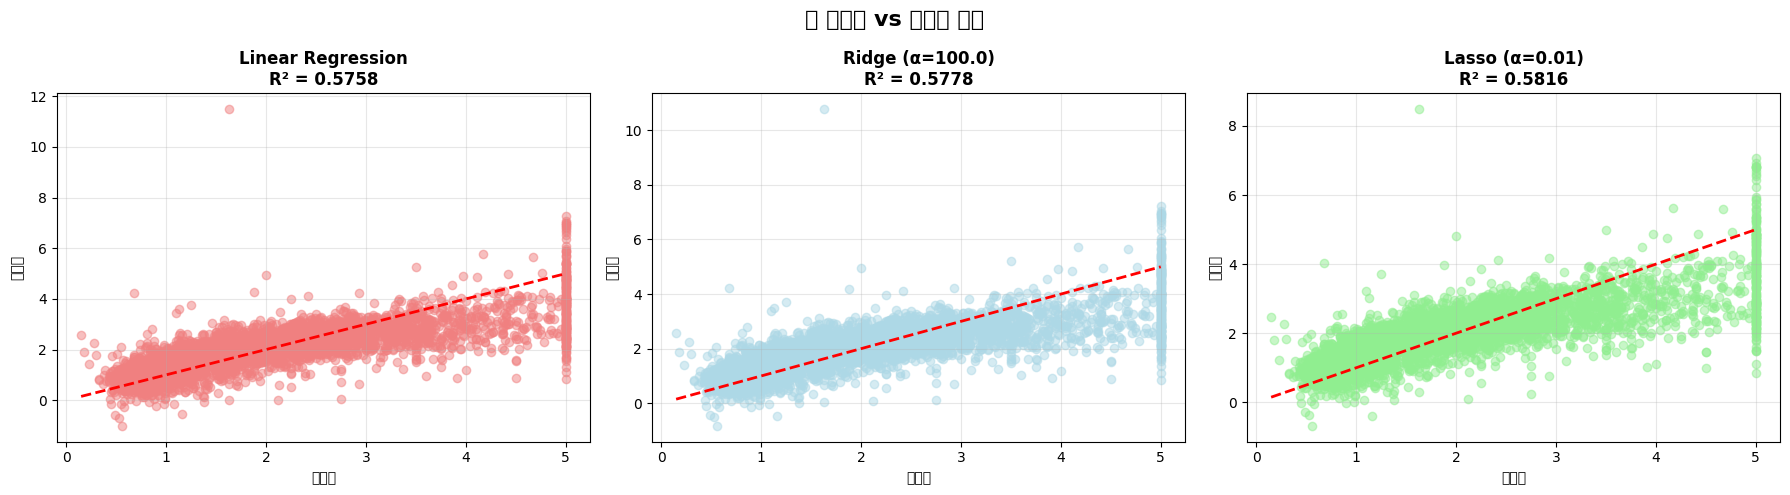

In [11]:
# 실제값 vs 예측값 산점도
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('🎯 실제값 vs 예측값 비교', fontsize=16, fontweight='bold')

model_keys = ['linear', best_ridge_key, best_lasso_key]
colors = ['lightcoral', 'lightblue', 'lightgreen']
titles = ['Linear Regression', f'Ridge (α={best_ridge_alpha})', f'Lasso (α={best_lasso_alpha})']

for i, (key, color, title) in enumerate(zip(model_keys, colors, titles)):
    axes[i].scatter(y_test, results[key]['Predictions'], alpha=0.5, color=color)
    axes[i].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    axes[i].set_xlabel('실제값')
    axes[i].set_ylabel('예측값')
    axes[i].set_title(f'{title}\nR² = {results[key]["Test_R2"]:.4f}', fontweight='bold')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

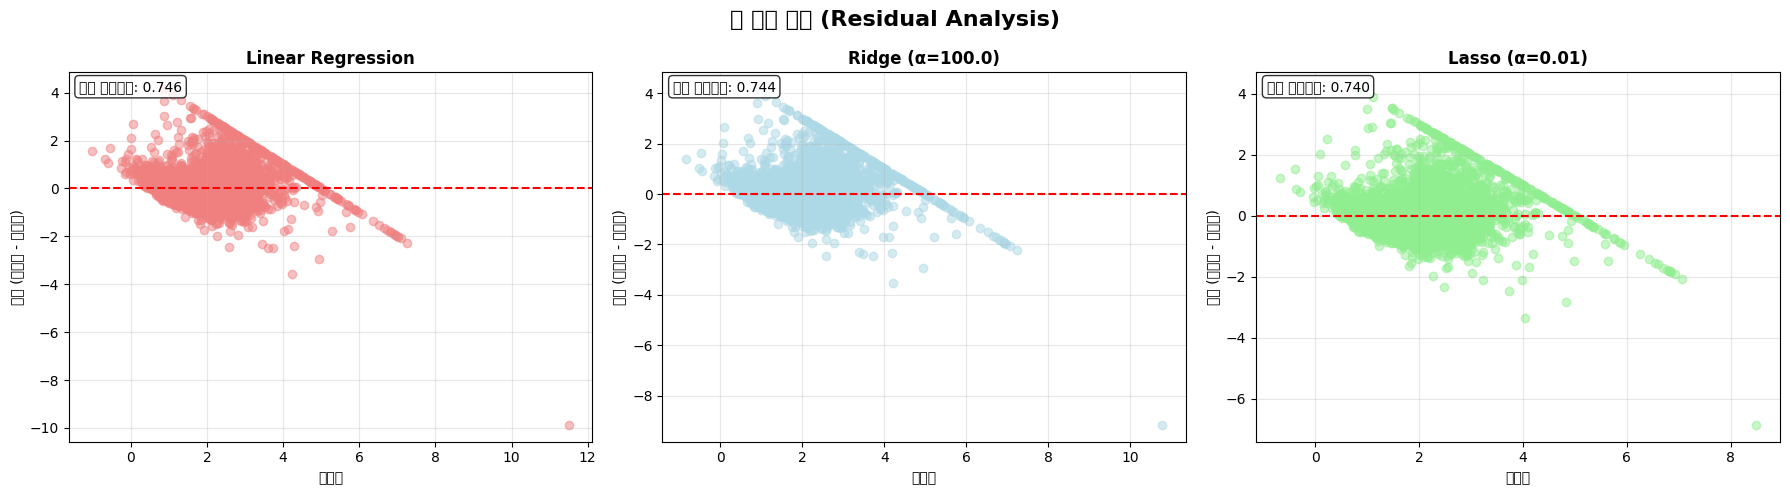

In [12]:
# 잔차 분석
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('📊 잔차 분석 (Residual Analysis)', fontsize=16, fontweight='bold')

for i, (key, color, title) in enumerate(zip(model_keys, colors, titles)):
    residuals = y_test - results[key]['Predictions']
    axes[i].scatter(results[key]['Predictions'], residuals, alpha=0.5, color=color)
    axes[i].axhline(y=0, color='red', linestyle='--')
    axes[i].set_xlabel('예측값')
    axes[i].set_ylabel('잔차 (실제값 - 예측값)')
    axes[i].set_title(f'{title}', fontweight='bold')
    axes[i].grid(True, alpha=0.3)
    
    # 잔차의 표준편차 표시
    std_residual = np.std(residuals)
    axes[i].text(0.02, 0.98, f'잔차 표준편차: {std_residual:.3f}', 
                transform=axes[i].transAxes, fontsize=10, 
                verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

## 6️⃣ 정규화 경로 분석 (Regularization Path)

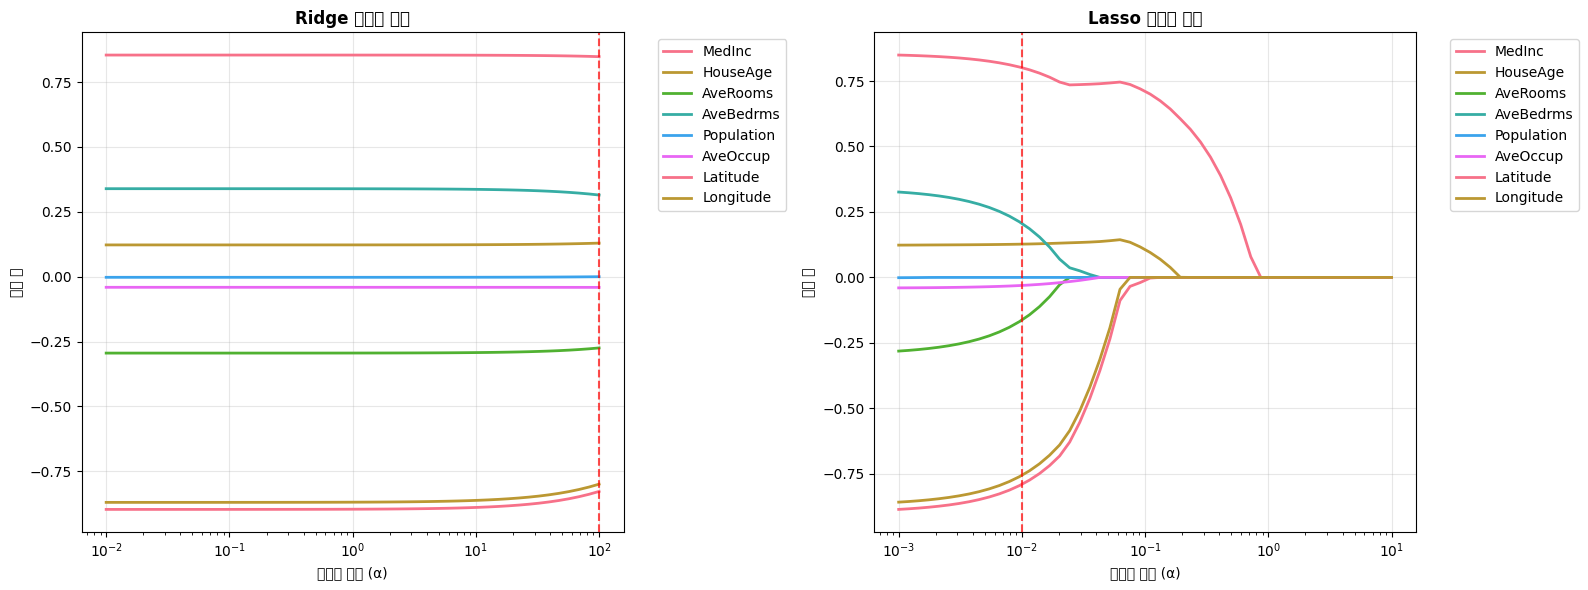

In [13]:
# Ridge와 Lasso의 정규화 경로 시각화
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Ridge 정규화 경로
alphas_ridge = np.logspace(-2, 2, 50)
ridge_coeffs = []

for alpha in alphas_ridge:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_scaled, y_train)
    ridge_coeffs.append(ridge.coef_)

ridge_coeffs = np.array(ridge_coeffs).T

for i, feature in enumerate(feature_names):
    ax1.plot(alphas_ridge, ridge_coeffs[i], label=feature, linewidth=2)

ax1.set_xscale('log')
ax1.set_xlabel('정규화 강도 (α)')
ax1.set_ylabel('계수 값')
ax1.set_title('Ridge 정규화 경로', fontweight='bold')
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax1.grid(True, alpha=0.3)
ax1.axvline(x=best_ridge_alpha, color='red', linestyle='--', alpha=0.7, label=f'최적 α={best_ridge_alpha}')

# Lasso 정규화 경로
alphas_lasso = np.logspace(-3, 1, 50)
lasso_coeffs = []

for alpha in alphas_lasso:
    lasso = Lasso(alpha=alpha, max_iter=2000)
    lasso.fit(X_train_scaled, y_train)
    lasso_coeffs.append(lasso.coef_)

lasso_coeffs = np.array(lasso_coeffs).T

for i, feature in enumerate(feature_names):
    ax2.plot(alphas_lasso, lasso_coeffs[i], label=feature, linewidth=2)

ax2.set_xscale('log')
ax2.set_xlabel('정규화 강도 (α)')
ax2.set_ylabel('계수 값')
ax2.set_title('Lasso 정규화 경로', fontweight='bold')
ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax2.grid(True, alpha=0.3)
ax2.axvline(x=best_lasso_alpha, color='red', linestyle='--', alpha=0.7, label=f'최적 α={best_lasso_alpha}')

plt.tight_layout()
plt.show()

## 📋 3단계 분석 결과 요약

In [14]:
print("🎯 3단계: 모델 구현 및 비교 결과 요약")
print("=" * 60)

print("\n📊 최종 성능 순위:")
performance_ranking = comparison_df.sort_values('Test_R²', ascending=False)
for i, (_, row) in enumerate(performance_ranking.iterrows(), 1):
    print(f"{i}. {row['모델']}: R² = {row['Test_R²']:.4f}, RMSE = {row['Test_RMSE']:.4f}")

print("\n🔍 주요 발견사항:")

# 과적합 분석
min_overfitting = comparison_df.loc[comparison_df['Over fitting'].idxmin()]
print(f"• 과적합 방지 효과: {min_overfitting['모델']} (과적합 정도: {min_overfitting['Over fitting']:.4f})")

# 특성 선택 효과
if zero_features:
    print(f"• Lasso 특성 선택: {len(zero_features)}개 특성 제거 ({', '.join(zero_features)})")
else:
    print(f"• Lasso 특성 선택: 모든 특성 유지 (α 값이 작아서 제거 효과 미미)")

# 정규화 효과
linear_coeff_sum = np.sum(np.abs(results['linear']['Coefficients']))
ridge_coeff_sum = np.sum(np.abs(results[best_ridge_key]['Coefficients']))
lasso_coeff_sum = np.sum(np.abs(results[best_lasso_key]['Coefficients']))

print(f"\n💡 정규화 효과:")
print(f"• 계수 크기 합계:")
print(f"  - Linear: {linear_coeff_sum:.3f}")
print(f"  - Ridge: {ridge_coeff_sum:.3f} ({((ridge_coeff_sum/linear_coeff_sum-1)*100):+.1f}%)")
print(f"  - Lasso: {lasso_coeff_sum:.3f} ({((lasso_coeff_sum/linear_coeff_sum-1)*100):+.1f}%)")

print(f"\n🎯 다음 단계 예고:")
print(f"• 4단계: GridSearchCV를 통한 하이퍼파라미터 최적화")
print(f"• 교차검증을 통한 더 정확한 최적 α 값 탐색")
print(f"• 학습 곡선과 검증 곡선 분석")

🎯 3단계: 모델 구현 및 비교 결과 요약

📊 최종 성능 순위:
1. Lasso (α=0.01): R² = 0.5816, RMSE = 0.7404
2. Ridge (α=100.0): R² = 0.5778, RMSE = 0.7438
3. Linear Regression: R² = 0.5758, RMSE = 0.7456

🔍 주요 발견사항:
• 과적합 방지 효과: Lasso (α=0.01) (과적합 정도: 0.0269)
• Lasso 특성 선택: 1개 특성 제거 (Population)

💡 정규화 효과:
• 계수 크기 합계:
  - Linear: 3.421
  - Ridge: 3.235 (-5.4%)
  - Lasso: 2.873 (-16.0%)

🎯 다음 단계 예고:
• 4단계: GridSearchCV를 통한 하이퍼파라미터 최적화
• 교차검증을 통한 더 정확한 최적 α 값 탐색
• 학습 곡선과 검증 곡선 분석
